In [0]:
!pip install kaggle


In [0]:
!mkdir .kaggle
!mkdir .s


In [0]:
import json
token = {"username":"tesla2","key":"2e88d384a9e1fa7950bfae00ad07e151"}
with open("/content/kaggle.json", "w") as file:
    json.dump(token, file)
!ls

kaggle.json  sample_data


In [0]:
!chmod 600 /content/.s/kaggle.json

In [0]:
!cp /content/kaggle.json ~/.kaggle/kaggle.json

In [0]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!kaggle datasets download -d puneet6060/intel-image-classification -p /content 

 99% 339M/344M [00:05<00:00, 55.8MB/s]
100% 344M/344M [00:05<00:00, 62.9MB/s]


In [0]:
X=!unzip -qq /content/intel-image-classification.zip

In [0]:
!unzip -qq /content/seg_test.zip
!unzip -qq /content/seg_train.zip

In [0]:

 
import os
import zipfile
 
 
def retrieve_file_paths(dirName):
 
  # setup file paths variable
  filePaths = []
   
  # Read all directory, subdirectories and file lists
  for root, directories, files in os.walk(dirName):
    for filename in files:
        # Create the full filepath by using os module.
        filePath = os.path.join(root, filename)
        filePaths.append(filePath)
         
  # return all paths
  return filePaths
 
 
# Declare the main function
def main():
# Assign the name of the directory to zip
  dir_name = 'mydir'
   
  # Call the function to retrieve all files and folders of the assigned directory
  filePaths = retrieve_file_paths('/content/dataset5/C')
   
  # printing the list of all files to be zipped
  print('The following list of files will be zipped:')
  for fileName in filePaths:
    print(fileName)
     
  # writing files to a zipfile
  zip_file = zipfile.ZipFile(dir_name+'.zip', 'w')
  with zip_file:
    # writing each file one by one
    for file in filePaths:
      zip_file.write(file)
       
  print(dir_name+'.zip file is created successfully!')
   
# Call the main function
if __name__ == "__main__":
  main()

In [0]:
!apt-get install p7zip-full
!tar -xvf /content/fingerspelling5.tar.bz2

In [0]:
import keras
from keras import models
from keras import layers

from keras.layers import Dense,GlobalAveragePooling2D,Flatten,Dropout,BatchNormalization
from keras.layers import Conv2D, MaxPooling2D


In [0]:
from keras.applications import VGG16
from keras.applications import MobileNet
from keras.applications.inception_v3 import InceptionV3


base_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))
base_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
bloc

In [0]:
base_model=MobileNet(weights='imagenet',include_top=False,input_shape=(160, 160, 3)) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better result
x=Dropout(0.4)(x)
x=BatchNormalization()(x)
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(280,activation='relu')(x) #dense layer 3
preds=Dense(6,activation='softmax')(x) #final layer with softmax activation

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
from keras.models import Model

model=Model(inputs=base_model.input,outputs=preds)

for layer in model.layers[:70]:
    layer.trainable=False
for layer in model.layers[70:]:
    layer.trainable=True
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 160, 160, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 161, 161, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 80, 80, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 80, 80, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 80, 80, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 80, 80, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 80, 80, 32)        128       
__________

In [0]:
x=base_model.output
from keras.models import Model

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x=Dropout(0.4)(x)
x=BatchNormalization()(x)
x = Dense(512, activation='relu')(x)

x = Dense(6 , activation='sigmoid')(x)
model=Model(inputs=base_model.input,outputs=x)
model.summary()


In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


In [0]:
model.trainable = True

set_trainable = False
for layer in model.layers:
    if layer.name == 'block5_conv2':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [0]:
model.summary()

In [0]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

#base_dir = '/content/drive/My Drive/facess'

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
    horizontal_flip = True,

rotation_range=30
      
      
      )

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        '/content/seg_train',
        # All images will be resized to 150x150
        target_size=(160, 160),
        batch_size=100,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    '/content/seg_test',
        
        target_size=(160, 160),
        batch_size=50,
        class_mode='categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [0]:
from keras import models
from keras import layers
from keras import optimizers

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=141,
      epochs=25,
      validation_data=validation_generator,
      validation_steps=60)

Epoch 1/25
141/141 [==============================] - 101s 715ms/step - loss: 0.4427 - acc: 0.8551 - val_loss: 2.1572 - val_acc: 0.6557
Epoch 2/25
141/141 [==============================] - 94s 668ms/step - loss: 0.2957 - acc: 0.9006 - val_loss: 0.4850 - val_acc: 0.8393
Epoch 3/25
141/141 [==============================] - 95s 672ms/step - loss: 0.2478 - acc: 0.9190 - val_loss: 1.3894 - val_acc: 0.8010
Epoch 4/25
141/141 [==============================] - 102s 725ms/step - loss: 0.2506 - acc: 0.9227 - val_loss: 0.3815 - val_acc: 0.8907
Epoch 5/25
141/141 [==============================] - 104s 735ms/step - loss: 0.2027 - acc: 0.9341 - val_loss: 0.8150 - val_acc: 0.8727
Epoch 6/25
141/141 [==============================] - 105s 748ms/step - loss: 0.1985 - acc: 0.9367 - val_loss: 0.9254 - val_acc: 0.8483
Epoch 7/25
141/141 [==============================] - 102s 724ms/step - loss: 0.1719 - acc: 0.9431 - val_loss: 0.5122 - val_acc: 0.8977
Epoch 8/25
141/141 [==============================

<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
(160, 160, 3)
[[2.6230483e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00]]
i see street


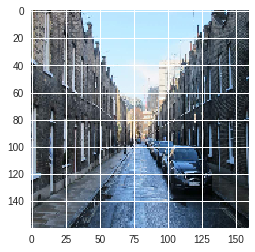

In [0]:
import numpy as np
%matplotlib inline
from keras.preprocessing import image

import matplotlib.pyplot as plt
import numpy as np


img_path = "/content/roupellstreet2108B.jpg"
img = image.load_img(img_path, target_size=(160, 160))
print(type(img))
plt.imshow(img)


x = image.img_to_array(img)
x=x/255
print(type(x))
print(x.shape)
x = np.expand_dims(x, axis=0)
x=x.reshape(1,160,160,3)
#
predictions = model.predict(x)     # Vector of probabilities
print(predictions)
classes =['building','forest','glacier','mountain','sea','street']
q=np.argmax(predictions)

print('i see',classes[q])


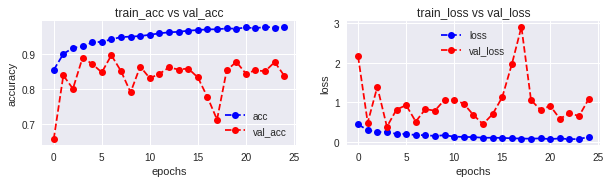

In [0]:
fig = plt.figure(figsize=(10,5))
plt.subplot(221)
plt.plot(history.history['acc'],'bo--', label = "acc")
plt.plot(history.history['val_acc'], 'ro--', label = "val_acc")
plt.title("train_acc vs val_acc")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

plt.subplot(222)
plt.plot(history.history['loss'],'bo--', label = "loss")
plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")


plt.legend()
plt.show()